In [5]:
import nltk
import pandas as pd
import pysentiment2 as ps
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords, PlaintextCorpusReader
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import requests
import numpy as np
from datetime import datetime

In [2]:
#pip install pysentiment2

Note: you may need to restart the kernel to use updated packages.


In [2]:
#pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jizha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jizha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [6]:
fh_key = 'bt3efpf48v6tfcs816eg'
fm_key = '8a1cf9d14d53126b05c8a7636fe3d006'
ticker = 'FB'
today = datetime.today().strftime('%Y-%m-%d')

market_news = requests.get(f'https://finnhub.io/api/v1/news?category=general&token={fh_key}').json()
market_news = pd.DataFrame(market_news)
print(np.unique(market_news.source))

company_news = requests.get(f'https://finnhub.io/api/v1/company-news?symbol={ticker}&from={today}&to={today}&token={fh_key}').json()
company_news = pd.DataFrame(company_news)
print(np.unique(company_news.source))

stock_news = requests.get(f'https://financialmodelingprep.com/api/v3/stock_news?tickers={ticker}&limit=50&apikey={fm_key}').json()
stock_news = pd.DataFrame(stock_news)
print(np.unique(stock_news.site))

['Bloomberg' 'CNBC' 'MarketWatch' 'Reuters']
['SeekingAlpha']
['24/7 Wall Street' 'Benzinga' 'Business Insider' 'CNBC' 'CNBC Television'
 'Fox Business' 'GuruFocus' 'InvestorPlace' 'Invezz' 'PYMNTS'
 'Proactive Investors' 'Reuters' 'Schaeffers Research' 'See It Market'
 'Seeking Alpha' 'TechXplore' 'The Dog of Wall Street' 'The Motley Fool'
 'Yahoo Finance' 'Zacks Investment Research']


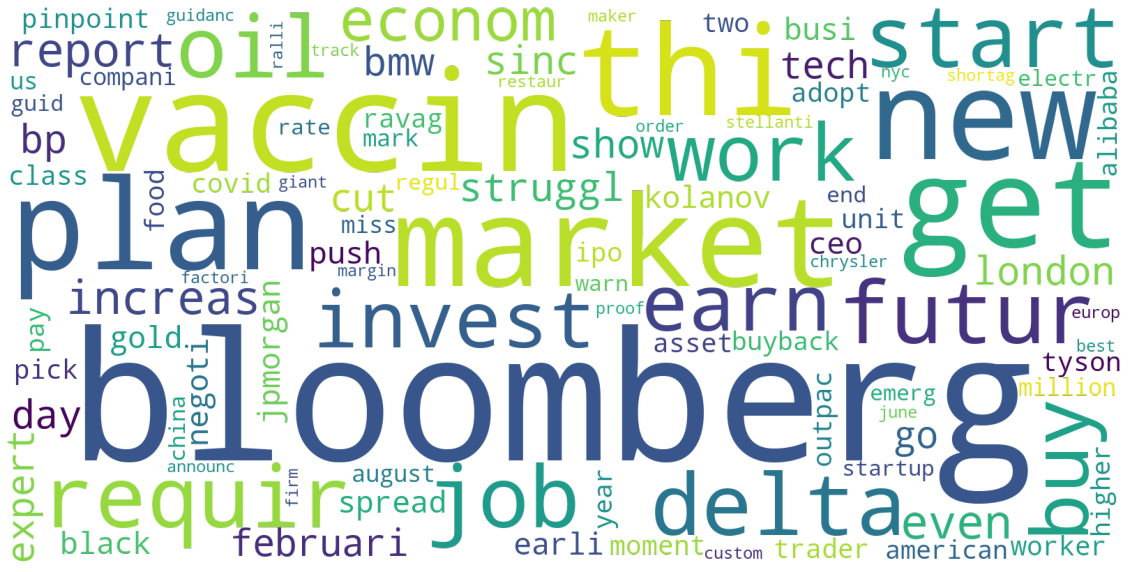

In [7]:
market_news = market_news.loc[:,['headline']]
stop_words = set(stopwords.words('english'))
lm = ps.LM()
market_news.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
market_news['headline'] = market_news['headline'].str.lower()
headlines  = []
head_clean = []
sentscore  = []
porter = PorterStemmer()
for row in range(len(market_news.index)):
    document = ' '.join(str(x) for x in market_news.iloc[row,:])
    headlines.append(document)
    tokens  =  word_tokenize(document)
    stemmed = [porter.stem(word) for word in tokens]
    words   = [w for w in stemmed if not w in stop_words]
    head_clean.append(' '.join(word for word in words))
    tokens  = lm.tokenize(' '.join(word for word in words))
    sentscore.append(lm.get_score(tokens)['Polarity'])

market_proc = pd.DataFrame(head_clean, columns = ['processed'])
market_proc['origi'] = headlines
entir = ' '.join(doc for doc in head_clean)
entire = ' '.join(doc for doc in headlines)

# market_proc

# Plot 100 most frequent words
sw = stopwords.words('english')
sw.extend(['u', 'ha', 'wa', 'say', 'q', 'stock', 'S'])
wc = WordCloud(width = 1600, height = 800, max_words = 100,\
               stopwords = sw,\
               background_color = None, mode = "RGBA" ).generate_from_text(entir)

plt.figure(figsize = (20, 20))
plt.imshow(wc)
plt.axis('off')
plt.show()

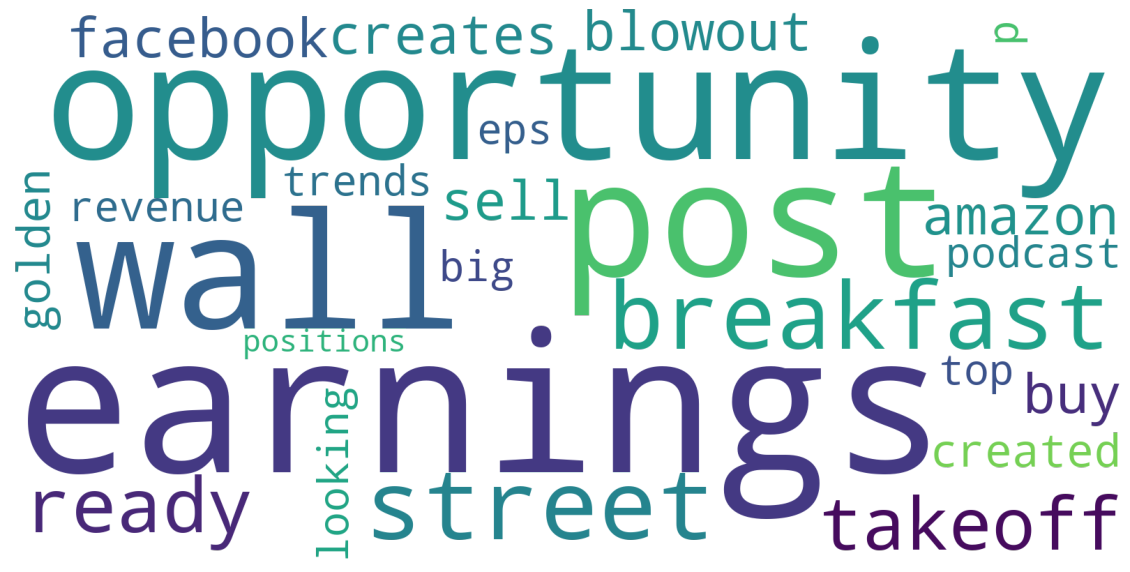

In [8]:
company_news = company_news.loc[:,['headline']]
stop_words = set(stopwords.words('english'))
lm = ps.LM()
company_news.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
company_news['headline'] = company_news['headline'].str.lower()
headlines  = []
head_clean = []
sentscore  = []
porter = PorterStemmer()
for row in range(len(company_news.index)):
    document = ' '.join(str(x) for x in company_news.iloc[row,:])
    headlines.append(document)
    tokens  =  word_tokenize(document)
    stemmed = [porter.stem(word) for word in tokens]
    words   = [w for w in stemmed if not w in stop_words]
    head_clean.append(' '.join(word for word in words))
    tokens  = lm.tokenize(' '.join(word for word in words))
    sentscore.append(lm.get_score(tokens)['Polarity'])

company_proc = pd.DataFrame(head_clean, columns = ['processed'])
company_proc['origi'] = headlines
# entir_comp = ' '.join(doc for doc in head_clean)
entir_comp = ' '.join(doc for doc in headlines)

# companu_proc

# Plot 100 most frequent words
# wc = WordCloud(max_words = 100, stopwords = stopwords.words('english').append(['u', 'ha', 'wa', 'say', 'q']),\
#                background_color = None, mode = "RGBA" ).generate_from_text(entir_comp)
sw = stopwords.words('english')
sw.extend(['u', 'ha', 'wa', 'say', 'q', 'stock', 'stocks', 'S'])
wc = WordCloud(width=1600, height=800, max_words = 100,\
               stopwords = sw,\
               background_color = None, mode = "RGBA" ).generate_from_text(entir_comp)

plt.figure(figsize = (20, 20))
plt.imshow(wc)
plt.axis('off')
plt.show()

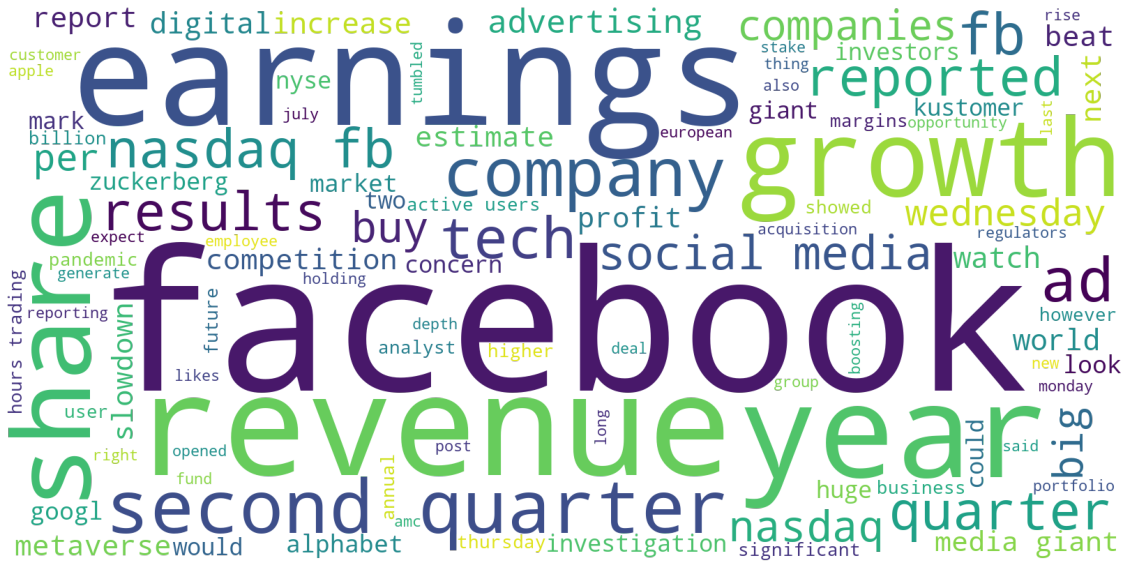

In [9]:
stock_news = stock_news.loc[:,['text']]
stop_words = set(stopwords.words('english'))
lm = ps.LM()
stock_news.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
stock_news['text'] = stock_news['text'].str.lower()
headlines  = []
head_clean = []
sentscore  = []
porter = PorterStemmer()
for row in range(len(stock_news.index)):
    document = ' '.join(str(x) for x in stock_news.iloc[row,:])
    headlines.append(document)
    tokens  =  word_tokenize(document)
    stemmed = [porter.stem(word) for word in tokens]
    words   = [w for w in stemmed if not w in stop_words]
    head_clean.append(' '.join(word for word in words))
    tokens  = lm.tokenize(' '.join(word for word in words))
    sentscore.append(lm.get_score(tokens)['Polarity'])

stock_proc = pd.DataFrame(head_clean, columns = ['processed'])
stock_proc['origi'] = headlines
# entir_stock = ' '.join(doc for doc in head_clean)
entir_stock = ' '.join(doc for doc in headlines)

# stock_proc

# Plot 100 most frequent words
sw = stopwords.words('english')
sw.extend(['u', 'ha', 'wa', 'say', 'q', 'stock', 'stocks', 'S', 'inc'])
wc = WordCloud(width = 1600, height = 800, max_words = 100, stopwords = sw,\
               background_color = None, mode = "RGBA").generate_from_text(entir_stock)

plt.figure(figsize = (20, 20))
plt.imshow(wc)
plt.axis('off')
plt.show()
# wc.to_file("/Users/erinnnz/SeaBridge/Keywords_extract/test.png")

In [82]:
# for ind in range(len(market_proc)):
#     file_id = str(ind)
#     with open('file_'+file_id+'.txt','w') as fout:
#         fout.write(market_proc.processed[ind])
#         fout.close()

# newcorpus = PlaintextCorpusReader('/Users/erinnnz/SeaBridge/Keywords_extract/Corpus', '.*')

# newcorpus

In [83]:
# def dtm_from_corpus(xCorpus):
#     '''
#     Create a dtm from a corpus. 
#     '''
#     s = 0
#     # this code works on my laptop, but if you have an apple these usually put
#     # in a .DS_Store file. Uncommenting the below might work in that case
#     # probably... make sure there are no hidden files in your Corpus folder!
#     # if so, these need to not be included in the dtm obviously. I feel like
#     # there should be a better way to do this, but this is it for now.

#     #if '.DS_Store' in newcorpus.fileids(): s=1

#     fd_list = []
#     for x in range(s, len(xCorpus.fileids())):
#         fd_list.append(nltk.FreqDist(xCorpus.words(xCorpus.fileids()[x])))
#     dtm = pd.DataFrame(fd_list, index = xCorpus.fileids()[s:])
#     dtm.fillna(0,inplace = True)
#     return dtm


# dtm = dtm_from_corpus(newcorpus)

# dtm.sum()

In [84]:
# def word_frequency(sentence,stopwords):
#     '''
#     joins all the sentence, creates tokens, creates lower class, removes
#     numbers and lemmatizes the words
#     '''
#     new_tokens = word_tokenize(sentence)
#     new_tokens = [t.lower() for t in new_tokens]
#     new_tokens =[t for t in new_tokens if t not in stop_words]
#     new_tokens = [t for t in new_tokens if t.isalpha()]
#     lemmatizer = WordNetLemmatizer()
#     new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
#     #counts the words, pairs and trigrams
#     counted   = Counter(new_tokens)
#     counted_2 = Counter(ngrams(new_tokens,2))
#     counted_3 = Counter(ngrams(new_tokens,3))
#     #creates 3 data frames and returns thems
#     word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
#     word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
#     trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
#     return word_freq,word_pairs,trigrams

# data2, data3, data4 = word_frequency(entir,stop_words)

# YAKE

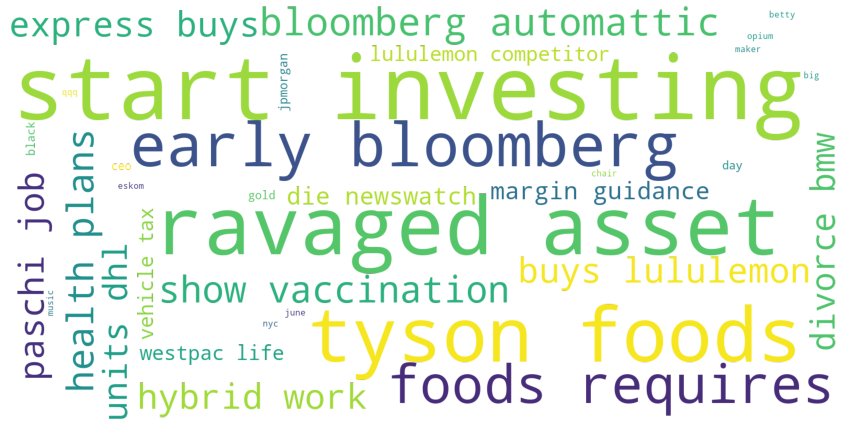

In [10]:
import yake

kw_extractor = yake.KeywordExtractor()
text = entire
language = 'en'
max_ngram_size = 2
deduplication_threshold = 0.2
numOfKeywords = 100
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size,\
                                            dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text)
# keywords

d = {}
for k, v in keywords:
    d[k] = 1/v

# wc = WordCloud(width = 1600, height = 800,\
#                background_color = None, mode = "RGBA").generate_from_frequencies(d)
wc = WordCloud(width = 1600, height = 800,\
               background_color = None, mode = "RGBA").fit_words(d)

plt.figure(figsize = (15, 15))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [10]:
pip install yake

  Created wheel for jellyfish: filename=jellyfish-0.8.2-py3-none-any.whl size=10422 sha256=490a81d233abc90922b23a79bbf615328e7266b03e9b37f09fa826874d8514fe
  Stored in directory: c:\users\jizha\appdata\local\pip\cache\wheels\dc\f2\ee\514a3c4bd93af451c473dfc24fc5238838e21df77f76f385eb
  Created wheel for segtok: filename=segtok-1.5.10-py3-none-any.whl size=25018 sha256=6ec3823c1cff4a382e21109983f5b54682207375fb8ac646d013ae3dcb204b29
  Stored in directory: c:\users\jizha\appdata\local\pip\cache\wheels\36\6d\90\6d9b11ba404f68f340ef3f6060cfdf9c9f34653b08eceeacf6
Successfully built jellyfish segtok
Note: you may need to restart the kernel to use updated packages.


# Rake-ntlk

In [1]:
#pip install rake-nltk


  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=5fd437acad594ba2bbfbc19736a9c944ea7d42a7c3d4999a1238c1c4c593912e
  Stored in directory: c:\users\jizha\appdata\local\pip\cache\wheels\f8\95\fd\23f0be53d1c5d234377f3f85ce063be7d894f0ecdb568389df
Successfully built rake-nltk


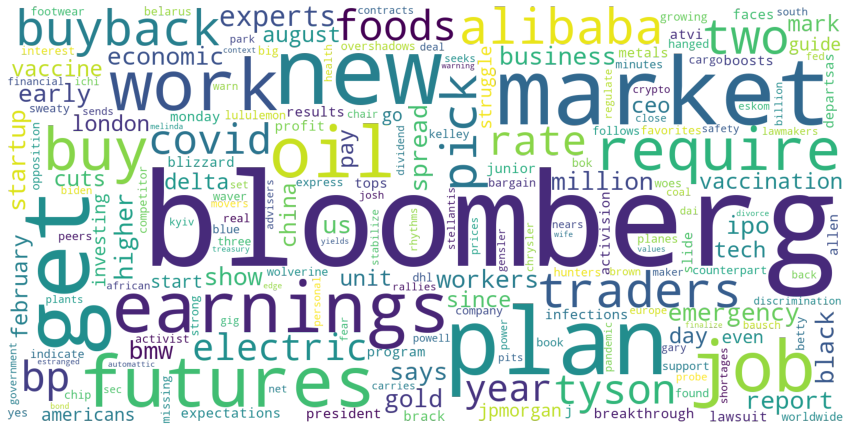

In [11]:
from rake_nltk import Rake
rake_nltk_var = Rake(stopwords = sw)
rake_nltk_var.extract_keywords_from_text(entire)
keyword_extracted = rake_nltk_var.get_ranked_phrases()
# keyword_extracted
unique_string=(" ").join(keyword_extracted)
wc = WordCloud(width = 1600, height = 800, stopwords = sw,\
               background_color = None, mode = "RGBA").generate(unique_string)
plt.figure(figsize = (15, 15))
plt.imshow(wc)
plt.axis('off')
plt.show()

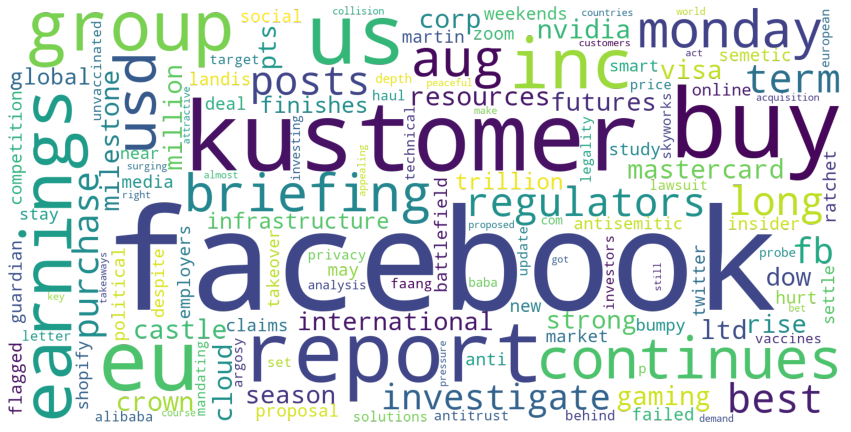

In [91]:
rake_nltk_var_comp = Rake(stopwords = sw)
rake_nltk_var_comp.extract_keywords_from_text(entir_comp)
keyword_extracted_comp = rake_nltk_var_comp.get_ranked_phrases()
# keyword_extracted
unique_string=(" ").join(keyword_extracted_comp)
wc = WordCloud(width = 1600, height = 800, stopwords = sw,\
               background_color = None, mode = "RGBA").generate(unique_string)
plt.figure(figsize = (15, 15))
plt.imshow(wc)
plt.axis('off')
plt.show()

# Gensim

In [13]:
pip install gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.23
    Uninstalling Cython-0.29.23:
      Successfully uninstalled Cython-0.29.23
Note: you may need to restart the kernel to use updated packages.


In [12]:
from gensim.summarization import keywords

keywords(entire)

ModuleNotFoundError: No module named 'gensim'

In [76]:
conda update gensim


PackageNotInstalledError: Package is not installed in prefix.
  prefix: /Users/erinnnz/opt/anaconda3
  package name: gensim



Note: you may need to restart the kernel to use updated packages.


In [73]:
# from importlib.metadata import version
# version('gensim')